## Plotting Titanic Dataset

In [72]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.express as px

In [73]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a bar chart for number of passengers survived by class

Number of Passengers who survived from pclass 1: 200
Number of Passengers who survived from pclass 2: 119
Number of Passengers who survived from pclass 3: 181


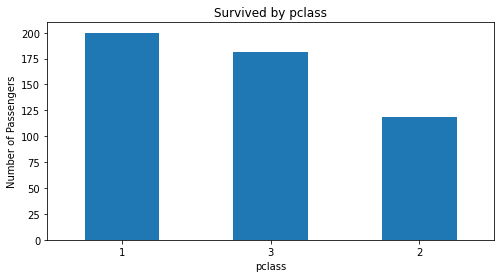

In [74]:
titanicS = titanic.loc[(titanic['survived'] == 1)]

print("Number of Passengers who survived from pclass 1:", titanicS["survived"][titanicS["pclass"] == 1].count())
print("Number of Passengers who survived from pclass 2:", titanicS["survived"][titanicS["pclass"] == 2].count())
print("Number of Passengers who survived from pclass 3:", titanicS["survived"][titanicS["pclass"] == 3].count())

f,ax = plt.subplots(1,figsize=(8,4))
graph = titanicS['pclass'].value_counts().plot.bar(ax=ax)
graph.set_title('Survived by pclass')
plt.xlabel('pclass')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()


#### 2. Create a vertical bar chart for passengers survived by class and gender

In [75]:
male_data = titanicS[titanicS['sex'] == 'male'].groupby(by=['pclass','sex'])['sex'].count()
male_data.reset_index(name = 'Number of Passengers')

,pclass,sex,Number of Passengers
0,1,male,61
1,2,male,25
2,3,male,75


In [76]:
female_data = titanicS[titanicS['sex'] == 'female'].groupby(by=['pclass','sex'])['sex'].count()
female_data.reset_index(name = 'Number of Passengers')

,pclass,sex,Number of Passengers
0,1,female,139
1,2,female,94
2,3,female,106


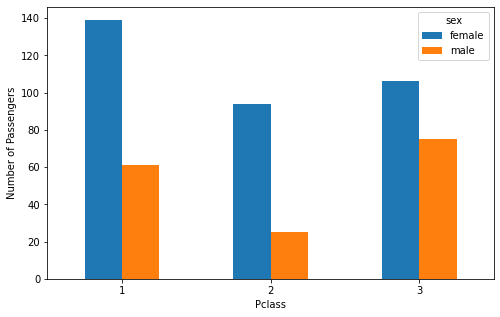

In [77]:
data = pd.concat([female_data,male_data], axis = 0)
data.reset_index(name = 'Number of Passengers')

f, ax = plt.subplots(1,figsize=(8,5))
data.unstack().plot.bar(ax=ax)
plt.xticks(rotation=0)
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.show()

#### 3. Create a stacked chart survived vs dead for different classes and gender

In [78]:
titanicD = titanic.loc[(titanic['survived'] == 0)]

In [79]:
male_data = titanicD[titanicD['sex'] == 'male'].groupby(by=['pclass','sex'])['sex'].count()
male_data.reset_index(name = 'Number of Passengers that Died')

,pclass,sex,Number of Passengers that Died
0,1,male,118
1,2,male,146
2,3,male,418


In [80]:
female_data = titanicD[titanicD['sex'] == 'female'].groupby(by=['pclass','sex'])['sex'].count()
female_data.reset_index(name = 'Number of Passengers that Died')

,pclass,sex,Number of Passengers that Died
0,1,female,5
1,2,female,12
2,3,female,110


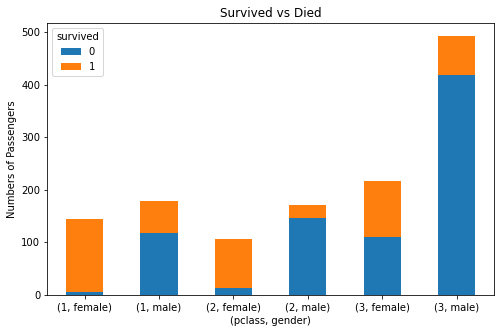

In [92]:
dataD = pd.concat([female_data,male_data], axis = 0)
dataD.reset_index(name = 'Number of Passengers')

final_data = titanic.groupby(by=['pclass','sex','survived'])['survived'].count()

f, ax = plt.subplots(1,figsize=(8,5))
final_data.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation=0)
plt.title("Survived vs Died")
plt.xlabel("(pclass, gender)")
plt.ylabel("Numbers of Passengers")
plt.show()

#### 4. Plot histogram of fares paid for passengers bins = 30

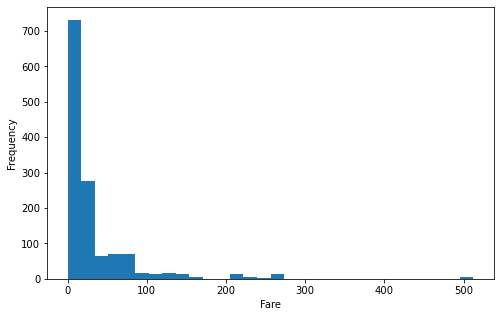

In [93]:
histo = titanic['fare']

f, ax = plt.subplots(1,figsize=(8,5))
histo.plot.hist(bins=30, ax=ax)
plt.xlabel('Fare')
plt.show()

#### 5.Create a KDE vs bar plot of the fare

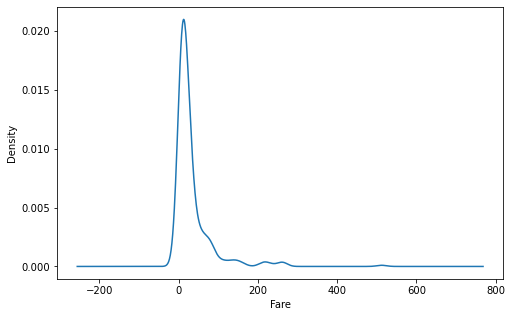

In [94]:
f, ax = plt.subplots(1,figsize=(8,5))
plt.xlabel('Fare')
ax1 = titanic['fare'].plot.kde(ax=ax)

#### 6. Create a box plot of the fares by passenger class

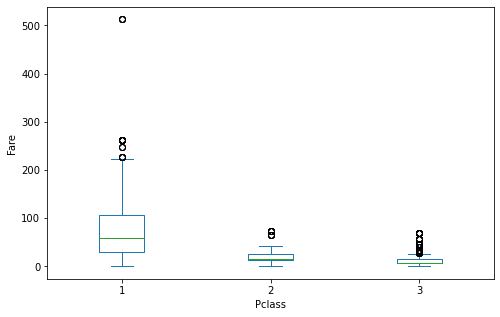

In [95]:
data = titanic[['pclass', 'fare']].pivot(columns = 'pclass', values = 'fare')

f, ax = plt.subplots(1,figsize=(8,5))
data.plot.box(ax=ax)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

#### 7. Create a box plot of the age by passenger class

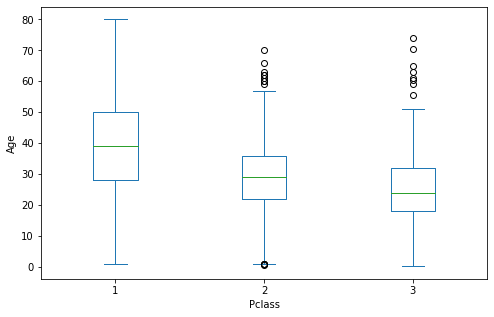

In [96]:
data = titanic[['pclass', 'age']].pivot(columns = 'pclass', values = 'age')

f, ax = plt.subplots(1,figsize=(8,5))
data.plot.box(ax=ax)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

#### Try Plotly to do all of the above